## PCA算法 

### 算法原理  
设有m条n维数据。

1）将原始数据按列组成n行m列矩阵X

2）将X的每一行（代表一个属性字段）进行零均值化，即减去这一行的均值

3）求出协方差矩阵

4）求出协方差矩阵的特征值及对应的特征向量

5）将特征向量按对应特征值大小从上到下按行排列成矩阵，取前k行组成矩阵P

6）Y=PX即为降维到k维后的数据

In [4]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import mat, linalg

In [5]:
# 加载数据
iris = load_iris()
# data  = iris.data[:100, :2]
data = np.array([[-1, -2],
                [-1, 0],
                [0, 0],
                [2, 1],
                [0, 1]])
data = data.T

In [12]:
data.shape
pd.DataFrame(data.T, columns=["feature1", "feature2"], index=range(1, 6))

,feature1,feature2
1,-1,-2
2,-1,0
3,0,0
4,2,1
5,0,1


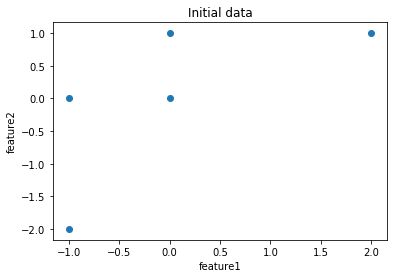

In [13]:
plt.scatter(data[0,:], data[1,:])
plt.title("Initial data")
plt.savefig("imgs/原始数据分布.png")
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

In [14]:
# 1. 每一字段减均值
mean = data.mean(axis = 1)
for i in range(len(mean)):
    for j in range(data.shape[1]):
        data[i, j] = data[i, j] - mean[i]
data        

array([[-1, -1,  0,  2,  0],
       [-2,  0,  0,  1,  1]])

In [15]:
# 2. 计算协方差矩阵()
X_cov = np.cov(data,ddof=0)
X_cov

array([[1.2, 0.8],
       [0.8, 1.2]])

In [16]:
total_var = X_cov[0, 0] + X_cov[1, 1]
total_var

2.4000000000000004

In [17]:
# 3.求解特征向量和特征值
d, u = linalg.eig(X_cov)
print("特征值:", d)
print("特征向量", u)

特征值: [2. +0.j 0.4+0.j]
特征向量 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [21]:
# 4.排列特征值 从大到小
ind = np.argsort(d)
ind = ind[::-1]
ind

array([0, 1])

In [19]:
u = u[:, ind]
u

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [22]:
# 计算新基下的坐标
Y = np.dot(u[1, :].T, data)
Y

array([-2.12132034, -0.70710678,  0.        ,  2.12132034,  0.70710678])

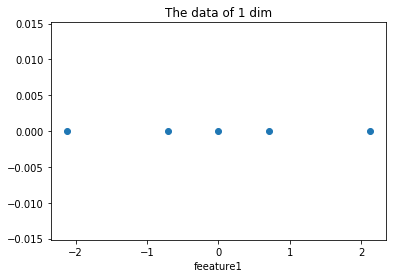

In [25]:
plt.scatter( Y[:], [0]*5)
plt.title("The data of 1 dim")
plt.xlabel("feeature1")
plt.savefig("imgs/数据降到一个维度.png")
plt.show()

In [47]:
data = np.array([[-1, -2],
                [-1, 0],
                [0, 0],
                [2, 1],
                [0, 1]])

[np.cov详解](https://blog.csdn.net/jeffery0207/article/details/83032325)